## Basic  Preparation for MIMIC-III Dataset for Discharge Codes Longitudinal Predictions Task

### Main Preparation Steps

1. Load dataframes from the downloaded dataset from Physionet.
2. Select patients with at least two admissions (i.e. for sequential prediction task).
3. Map subjects to single ethnicity in admissions.
4. Export three tables to the cohort directory:
    1. `adm_df.csv.gz`: for admission information.
    2. `static_df.csv.gz`: for demographic information (DoB, ethnicity, gender).
    3. `dx_df.csv.gz`: for discharge codes information linked to each admission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Set the raw dataset directory (folder) absolute path.
mimic_dir = '/home/asem/GP/ehr-data/physionet.org/files/mimiciii-cv/1.4'

# Set the target cohort directory.
cohort_dir = '/home/asem/GP/ehr-data/mimic3cv-cohort'

Path(cohort_dir).mkdir(parents=True, exist_ok=True)


In [3]:
adm_df = pd.read_csv(f'{mimic_dir}/ADMISSIONS.csv.gz')

In [4]:
adm_df.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
3,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
4,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1


In [5]:
f'#subjects: {len(set(adm_df.subject_id))}'

'#subjects: 23692'

<Axes: >

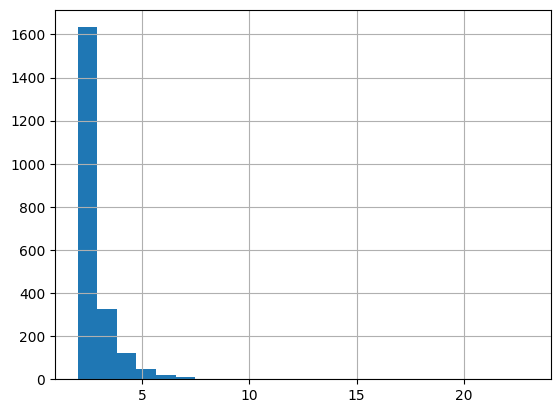

In [6]:
patients_n_admission = adm_df.groupby('subject_id').size()
patients_n_admission[patients_n_admission > 1].hist(bins=patients_n_admission.max())

In [7]:
# In GRAM paper, all patients with at least 2 visits were utilized (n=7537).
f'#subjects (n_admissions> 1): {len(patients_n_admission[patients_n_admission > 1])}'

'#subjects (n_admissions> 1): 2174'

#### Filter qualified subjects

In [8]:
qualified_subjects = patients_n_admission[patients_n_admission > 1].index
adm_df = adm_df[adm_df.subject_id.isin(qualified_subjects)]

In [9]:
adm_df

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
13,19,21,109451,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,JEWISH,MARRIED,WHITE,2134-09-11 09:22:00,2134-09-11 22:30:00,CONGESTIVE HEART FAILURE,0,1
14,20,21,111970,2135-01-30 20:50:00,2135-02-08 02:08:00,2135-02-08 02:08:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,MARRIED,WHITE,2135-01-30 18:46:00,2135-01-30 22:05:00,SEPSIS,1,1
44,60,61,176332,2118-06-17 14:40:00,2118-07-20 12:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKIN'S LYMPHOMIA\BONE MARROW TRANSPLANT,0,1
45,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1
49,67,67,186474,2155-02-25 12:45:00,2155-03-06 15:00:00,NaN,URGENT,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,JEWISH,SINGLE,WHITE,NaN,NaN,INCISIONAL HERNIA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26789,39638,32684,145206,2157-08-17 22:50:00,2157-08-26 13:40:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,GREEK ORTHODOX,MARRIED,WHITE,2157-08-17 13:27:00,2157-08-18 00:05:00,ABDOMINAL PAIN;CELLULITIS,0,1
26801,39711,32749,178539,2171-09-17 19:20:00,2171-09-20 16:08:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SHORT TERM HOSPITAL,Medicaid,ENGL,OTHER,SINGLE,WHITE,NaN,NaN,MEDIASTINUM TUMOR;LYMPHOMA,0,1
26802,39712,32749,138488,2171-10-01 14:33:00,2171-11-19 00:10:00,2171-11-19 00:10:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicaid,ENGL,OTHER,SINGLE,WHITE,NaN,NaN,RESPIRATORY FAILURE,1,1
26824,39748,32786,165351,2152-11-15 20:26:00,2152-12-08 11:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,ENGL,NOT SPECIFIED,SINGLE,WHITE,2152-11-15 18:39:00,2152-11-15 22:21:00,SUBARACHNOID HEMORRHAGE,0,1


In [10]:
def map_ethnicity(subj_df):
    
    def resolution(series):
        # Return the more detailed ethnicity (longer string)
        idx = series.apply(lambda s: len(s)).idxmax()
        return series.loc[idx]
    
    eth_df = subj_df['ethnicity']
    eth_df = eth_df[~eth_df.str.contains('UNKNOWN')]
    eth_df = eth_df[~eth_df.str.contains('UNABLE')]
    eth_df = eth_df[~eth_df.str.contains('DECLINED')]
    ethnicity_set = set(eth_df)
    
    if len(ethnicity_set) == 0:
        return 'UNKNOWN'
    if len(ethnicity_set) == 1:
        (ethnicity,) = ethnicity_set
        return ethnicity
    
    if eth_df.str.contains('WHITE').all():
        return resolution(eth_df)
    if eth_df.str.contains('ASIAN').all():
        return resolution(eth_df)
    if eth_df.str.contains('HISPANIC').all():
        return resolution(eth_df)
    if len(ethnicity_set) > 1:
        print(f'Unresolved (return "UNKNOWN"): {ethnicity_set}')
    
    return 'UNKNOWN'

subject_eth_df = adm_df.groupby('subject_id').apply(map_ethnicity)

Unresolved (return "UNKNOWN"): {'WHITE', 'BLACK/AFRICAN AMERICAN'}
Unresolved (return "UNKNOWN"): {'OTHER', 'WHITE'}


In [11]:
patients_df = pd.read_csv(f'{mimic_dir}/PATIENTS.csv.gz')
patients_df = patients_df[patients_df.subject_id.isin(qualified_subjects)].reset_index(drop=True)
patients_df['ethnicity'] = patients_df.subject_id.map(subject_eth_df)
patients_df = patients_df[['subject_id', 'gender', 'dob', 'ethnicity']]
patients_df.to_csv(f'{cohort_dir}/static_df.csv.gz', compression='gzip', index=False)

In [12]:
patients_df = pd.read_csv(f'{cohort_dir}/static_df.csv.gz')
patients_df.head()

,subject_id,gender,dob,ethnicity
0,21,M,2047-04-04 00:00:00,WHITE
1,61,M,2063-10-21 00:00:00,WHITE
2,67,M,2084-06-05 00:00:00,WHITE
3,68,F,2132-02-29 00:00:00,BLACK/AFRICAN AMERICAN
4,94,M,2101-09-20 00:00:00,ASIAN


In [13]:
adm_df

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
13,19,21,109451,2134-09-11 12:17:00,2134-09-24 16:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,JEWISH,MARRIED,WHITE,2134-09-11 09:22:00,2134-09-11 22:30:00,CONGESTIVE HEART FAILURE,0,1
14,20,21,111970,2135-01-30 20:50:00,2135-02-08 02:08:00,2135-02-08 02:08:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,MARRIED,WHITE,2135-01-30 18:46:00,2135-01-30 22:05:00,SEPSIS,1,1
44,60,61,176332,2118-06-17 14:40:00,2118-07-20 12:30:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKIN'S LYMPHOMIA\BONE MARROW TRANSPLANT,0,1
45,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1
49,67,67,186474,2155-02-25 12:45:00,2155-03-06 15:00:00,NaN,URGENT,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,JEWISH,SINGLE,WHITE,NaN,NaN,INCISIONAL HERNIA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26789,39638,32684,145206,2157-08-17 22:50:00,2157-08-26 13:40:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,GREEK ORTHODOX,MARRIED,WHITE,2157-08-17 13:27:00,2157-08-18 00:05:00,ABDOMINAL PAIN;CELLULITIS,0,1
26801,39711,32749,178539,2171-09-17 19:20:00,2171-09-20 16:08:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SHORT TERM HOSPITAL,Medicaid,ENGL,OTHER,SINGLE,WHITE,NaN,NaN,MEDIASTINUM TUMOR;LYMPHOMA,0,1
26802,39712,32749,138488,2171-10-01 14:33:00,2171-11-19 00:10:00,2171-11-19 00:10:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicaid,ENGL,OTHER,SINGLE,WHITE,NaN,NaN,RESPIRATORY FAILURE,1,1
26824,39748,32786,165351,2152-11-15 20:26:00,2152-12-08 11:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicaid,ENGL,NOT SPECIFIED,SINGLE,WHITE,2152-11-15 18:39:00,2152-11-15 22:21:00,SUBARACHNOID HEMORRHAGE,0,1


In [14]:
adm_df = adm_df[['subject_id', 'hadm_id', 'admittime', 'dischtime']]
adm_df.to_csv(f'{cohort_dir}/adm_df.csv.gz', compression='gzip', index=False)


In [15]:
dx_df = pd.read_csv(f'{mimic_dir}/DIAGNOSES_ICD.csv.gz', dtype = {'ICD9_CODE': str})
dx_df = dx_df[dx_df.icd9_code.notnull()].reset_index(drop=True)
dx_df = dx_df[dx_df.subject_id.isin(qualified_subjects)].reset_index(drop=True)
dx_df = dx_df[['hadm_id', 'icd9_code']]
dx_df.to_csv(f'{cohort_dir}/dx_df.csv.gz', compression='gzip', index=False)